<a href="https://colab.research.google.com/github/gabetrix/public-datasets/blob/main/trilha04_asso_regr_atividade_aprofundamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/gabetrix/public-datasets/main/pressao_sistolica.csv', sep=';')
dataset.shape

(7, 2)

In [4]:
dataset.head()

,Idade,Pressao_Sistolica
0,16,109
1,25,122
2,39,143
3,45,132
4,49,199


In [7]:
dataset.describe()

,Idade,Pressao_Sistolica
count,7.000000,7.000000
mean,44.000000,155.571429
std,19.459359,37.964269
min,16.000000,109.000000
25%,32.000000,127.000000
50%,45.000000,143.000000
75%,56.500000,192.000000
max,70.000000,199.000000


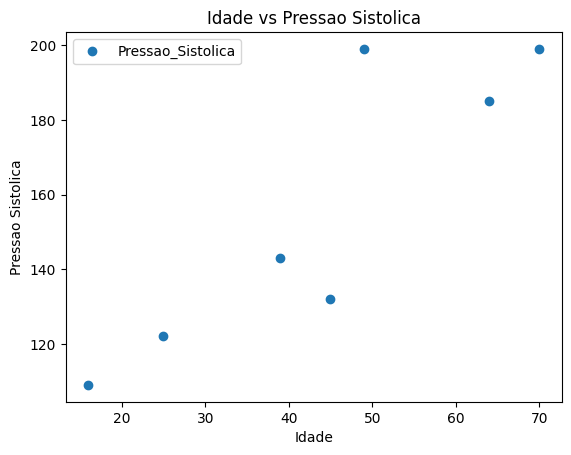

In [8]:
dataset.plot(x='Idade',y='Pressao_Sistolica', style='o')
plt.title('Idade vs Pressao Sistolica')
plt.xlabel('Idade')
plt.ylabel('Pressao Sistolica')
plt.show()

In [10]:
from scipy.stats.stats import pearsonr
print('Correlação: %0.5f' % pearsonr(dataset['Idade'], dataset['Pressao_Sistolica'])[0])

Correlação: 0.88346


<ipython-input-10-e26abb6192d6>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

76.45884413309983
[1.78166959]


In [20]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Esperado': y_test, 'Previsto': y_pred})
df

,Esperado,Previsto
0,109,104.965558
1,122,121.000584


In [21]:
from sklearn import metrics
print('MAE - Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE - Mean Square Error:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE - Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2', metrics.r2_score(y_test, y_pred))

MAE - Mean Absolute Error: 2.516929363689435
MSE - Mean Square Error: 8.637779536247827
RMSE - Root Mean Squared Error: 2.939009958514572
R2 0.7955555139349627


In [22]:
import seaborn as sns

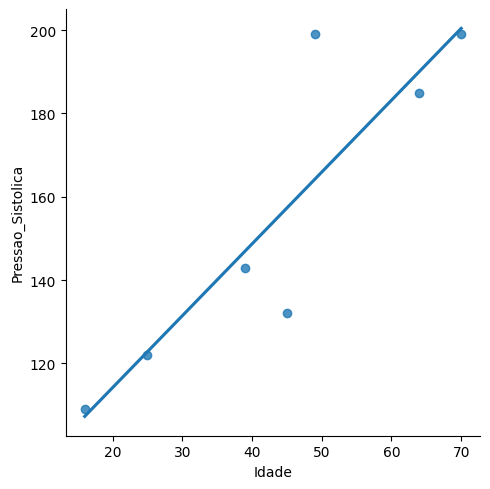

In [24]:
sns.lmplot(x='Idade', y='Pressao_Sistolica', data=dataset, ci=None)